# Sliding window graph

Sliding window graph is a special type of graph, that is made of multiple subgraphs, connected in sequential order.

## Creation process

We take our segment of a timeseries, and disect it into smaller segments with sliding window technique. Then we transform these segments of timeseries into graphs, using provided strategy, treat these graphs as nodes and sequentially connect them to form new snake like graph. This graph has for nodes subgraphs, each with the same number of nodes. Then we can combine identical subgraphs (subgraphs that have same edges) and we have our completed sliding window graph. 

### Example:

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from core.model import Timeseries, TimeseriesPreprocessing, TimeseriesPreprocessingSegmentation, TimeseriesPreprocessingSlidingWindow, TimeseriesPreprocessingComposite, TimeseriesView, TimeGraph
from tsg_io.input import CsvFile
from to_graph.strategy_linking_multi_graphs import LinkGraphs
from to_graph.strategy_to_graph import BuildTimeseriesToGraphNaturalVisibilityStrategy, BuildTimeseriesToGraphHorizontalVisibilityStrategy
import warnings
warnings.filterwarnings('ignore')

amazon_path = os.path.join(os.getcwd(), "amazon", "AMZN.csv")

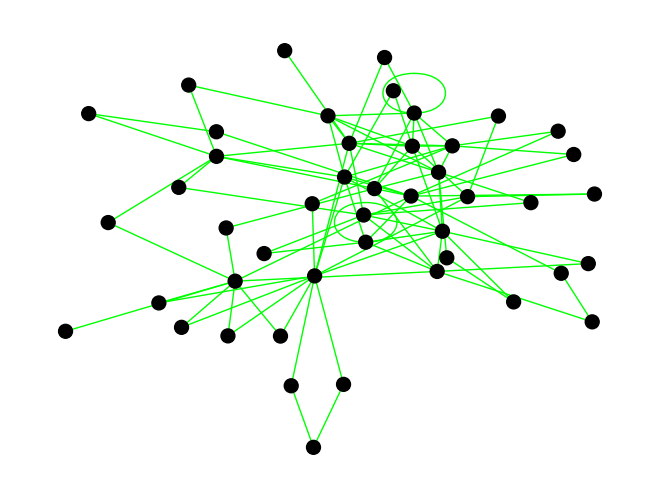

In [2]:
sliding_window_timegraph = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingComposite()\
        .add(TimeseriesPreprocessingSegmentation(100, 300))\
        .add(TimeseriesPreprocessingSlidingWindow(5)))\
    .to_graph(BuildTimeseriesToGraphNaturalVisibilityStrategy().get_strategy())\
    .link(LinkGraphs().sliding_window())\
    .combine_identical_subgraphs()\
    .draw()